# <font color='blue'>Airfoil Self-Noise Dataset</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Python Version:', python_version())

# Verificando as versões dos pacotes instalados
pandasVersion = !pip show pandas
matplotlibVersion = !pip show matplotlib
sklearnVersion = !pip show scikit-learn
print('Pandas', pandasVersion[1])
print("Matplotlib", matplotlibVersion[1])
print("Sklearn", sklearnVersion[1])

Python Version: 3.9.13
Pandas Version: 2.0.2
Matplotlib Version: 3.7.1
Sklearn Version: 1.2.2


## 1 - Definição do Problema de Negócio
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

O conjunto de dados Airfoil Self Noise Dataset é uma coleção comumente usada para análise e previsão de ruído de aerofólios. Ele contém dados relacionados à aerodinâmica e ao ruído gerado por aerofólios em túneis de vento. <br><br>
Este conjunto de dados disponibilizado pela NASA foi obtido a partir de uma série de testes aerodinâmicos e acústicos de seções bi e tridimensionais de pás de aerofólio conduzidas em um túnel de vento. <br><br>
Os dados são de aerofólios NACA 0012 de tamanhos diferentes que foram submetidos a diferentes velocidades de túnel de vento e ângulos de ataque. A envergadura do aerofólio e a posição do observador foram as mesmas em todos os experimentos. <br>
O objetivo deste trabalho é prever o nível de pressão sonora medida em decibéis a partir das variáveis existentes.<br><br>
Descrição das variáveis: <br>
- **Frequency**: Frequência medida em Hertzs;<br>
- **Angle of attack**: Ângulo de ataque do vento medido em graus; <br>
- **Chord length**: Comprimento da corda medido em metros; <br>
- **Free-stream velocity**: Velocidade de fluxo livre em metros por segundo;<br>
- **Suction side displacement thickness**: Espessura de deslocamento do lado de sucção em metros;<br>
- **Scaled sound pressure level**: Nível escalado de pressão sonora em decibéis (variável alvo).<br>
    
Endereço do conjunto de dados: https://archive.ics.uci.edu/dataset/291/airfoil+self+noise
</details>

## 2 - Coletando os dados

#### 2.1 - Importando as bibliotecas

In [2]:
# Manipulação e exploração do conjunto de dados
import pandas as pd
import numpy as np

# Cálculos matemáticos
import math

# Plotagem de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Imputação de valores nulos
from sklearn.impute import SimpleImputer

# Converter variáveis categóricas em números
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Seleção de variáveis
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Pré-processamento dos dados
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Dividir dados de treino e teste
from sklearn.model_selection import train_test_split

# Buscar os melhores parâmetros que serão utilizados nos modelos preditivos
from sklearn.model_selection import RandomizedSearchCV

# Cross Validation
from sklearn.model_selection import KFold, cross_val_score

# Algoritmos de Regressão
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor, AdaBoostRegressor, VotingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Métricas de avaliação dos modelos preditivos
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Carregar e salvar objetos Python em arquivos no disco
import pickle

# Esse módulo ignara os avisos
import warnings
warnings.filterwarnings("ignore")

#### 2.2 - Carregando os dados

In [3]:
# Definindo nome para as colunas
colunas = ["Frequencia", "AnguloDeAtaque", "ComprimentoDaCorda", "VelocidadeDoFluxo", "EspessuraDeDeslocamento", "NivelDePressaoSonora"]

# Endereço para download
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat"

# Carregando os dados
df = pd.read_csv(url, sep = "\t", names = colunas)
df

,Frequencia,AnguloDeAtaque,ComprimentoDaCorda,VelocidadeDoFluxo,EspessuraDeDeslocamento,NivelDePressaoSonora
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [4]:
# Separando a variável alvo
variavelAlvo = "NivelDePressaoSonora"

## 3 - Reservar linhas para validar o modelo

In [5]:
# Criando uma amostra do conjuto de dados
# O parâmetro "n" define a quantidade de linhas da amostra
dfValidacao = df.sample(n=2, random_state=1)
dfValidacao

,Frequencia,AnguloDeAtaque,ComprimentoDaCorda,VelocidadeDoFluxo,EspessuraDeDeslocamento,NivelDePressaoSonora
91,4000,1.5,0.3048,39.6,0.003921,117.741
75,6300,1.5,0.3048,71.3,0.003367,118.122


In [6]:
# Excluindo do DataFrame original as linhas que serão utilizadas para validar o modelo 
for k in dfValidacao.index:
    df.drop([k], inplace = True)

# É importante reiniciar os índices após a exclusão de linhas
df.reset_index(inplace = True)
df.head()

,index,Frequencia,AnguloDeAtaque,ComprimentoDaCorda,VelocidadeDoFluxo,EspessuraDeDeslocamento,NivelDePressaoSonora
0,0,800,0.0,0.3048,71.3,0.002663,126.201
1,1,1000,0.0,0.3048,71.3,0.002663,125.201
2,2,1250,0.0,0.3048,71.3,0.002663,125.951
3,3,1600,0.0,0.3048,71.3,0.002663,127.591
4,4,2000,0.0,0.3048,71.3,0.002663,127.461


In [7]:
# Excluindo coluna
df.drop(["index"], axis=1, inplace = True)
df.head()

,Frequencia,AnguloDeAtaque,ComprimentoDaCorda,VelocidadeDoFluxo,EspessuraDeDeslocamento,NivelDePressaoSonora
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


## 4 - Explorando os dados

#### 4.1 - Informações sobre o dataset

In [8]:
# Visualizando informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Frequencia               1501 non-null   int64  
 1   AnguloDeAtaque           1501 non-null   float64
 2   ComprimentoDaCorda       1501 non-null   float64
 3   VelocidadeDoFluxo        1501 non-null   float64
 4   EspessuraDeDeslocamento  1501 non-null   float64
 5   NivelDePressaoSonora     1501 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.5 KB


In [9]:
# Sumário estatístico
df.describe()

,Frequencia,AnguloDeAtaque,ComprimentoDaCorda,VelocidadeDoFluxo,EspessuraDeDeslocamento,NivelDePressaoSonora
count,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000
mean,2883.364424,6.789340,0.136324,50.854630,0.011150,124.845143
std,3153.310103,5.918926,0.093401,15.571509,0.013156,6.898639
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.209000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.724000
75%,4000.000000,9.900000,0.228600,71.300000,0.016104,130.000000
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


#### 4.2 - Tratando valores nulos

In [ ]:
# Verificando a quantidade de valores nulos por coluna
df.isnull().sum() 

In [ ]:
# Cria o objeto do tipo SimpleImputer com a média como estratégia  
imputeMedia = SimpleImputer(missing_values=np.nan, strategy= "mean")

In [ ]:
# Treina o objeto do tipo SimpleImputer, substitui os valores nulos pela média em cada coluna com valor NA
for k in df.columns[0:22]:
    
    # Verifica se a coluna possui valores nulos e se os valores não são do tipo texto
    if df[k].isnull().sum() > 0 and df[k].dtype != object:
        
        # Realiza a imputação nos dados nulos
        df[k] = imputeMedia.fit_transform(df[k].values.reshape(-1,1))

#### 4.2 - Tratando dados duplicados

In [10]:
# Verificando se existem dados duplicados.
# Ocorrem dados duplicados quando uma linha inteira, é igual a outra
df.duplicated().sum()

0

In [ ]:
# Excluindo as linhas duplicadas mantendo a primeira ocorrência da linha
df.drop_duplicates(ignore_index=True, inplace = True)

#### 4.3 - Tratando valores únicos

In [11]:
# Verificando a quantidade de valores únicos
# Variáveis quantitativas com muitos valores únicos podem prejudicar o aprendizado de máquina
df.nunique()

Frequencia                   21
AnguloDeAtaque               27
ComprimentoDaCorda            6
VelocidadeDoFluxo             4
EspessuraDeDeslocamento     105
NivelDePressaoSonora       1454
dtype: int64

#### 4.2 - Análise descritiva dos dados

##### 4.2.1 - Parâmetros dos gráficos

In [12]:
# Define a paleta de cores
sns.color_palette("pastel")

# Define o tema utilizado.
sns.set_theme(style="darkgrid") 

##### 4.2.2 - Funções para desenhar os gráficos

###### a) Histograma

In [13]:
# Função para plotar um histograma
def desenhaHistograma(coluna, variavelAnalisada):

    # Calculando a quantidade de classes da variável analisada
    n = coluna.count()
    k = round(1+3.3*math.log10(n))
   
    # Calculando o intervalo de cada classe
    frequencias, intervalos = np.histogram(coluna, bins = k)

    # Desenhando o gráfico
    fig = plt.subplots(figsize=(13, 6))
    ax = sns.histplot(coluna, bins=k, kde=True)
    ax.set_title("Histograma da variável " + variavelAnalisada, fontsize = 16)
    ax.set_xlabel(variavelAnalisada, fontsize = 12)
    ax.set_ylabel("Frequência", fontsize = 12)
    ax.set_xticks(intervalos) 
    for barras in ax.containers:
        ax.bar_label(barras)
    plt.show()

###### b) Boxplot

In [14]:
# Função para plotar um Boxplot
def desenhaBoxplot(coluna, variavelAnalisada):
    
    # Desenhando o gráfico
    fig = plt.subplots(figsize=(13, 6))
    ax = sns.boxplot(data=coluna)
    ax.set_title("Boxplot da variável " + variavelAnalisada, fontsize = 16)
    ax.set_xticklabels([variavelAnalisada]) # exibe o nome da variável
    larguraBox = 0.63
    i=0

    # calcula o primeiro quartil (q1), o segundo (q2) e o terceiro quartil (q3)
    q1, q2, q3 = coluna.quantile(0.25), coluna.quantile(0.5), coluna.quantile(0.75)
    
    # Lista com os quartis
    quartis = [q1, q2, q3]

    # Exibe os quartis no gráfico
    for q in quartis:
        x = i-larguraBox/2
        y = q
        ax.annotate('%.2f' % q, (x,y),
                    xytext=(x-0.1, y), textcoords='data',
                    va='center', ha='right')
    plt.show()

###### c) Scatter Plot

In [15]:
# Função para plotar um Scatter Plot
def desenhaScatterPlot(colunaX, colunaY, variavelAnalisadaX, variavelAnalisadaY):
    
    # Cria o gráfico definido pelos valores do eixo x e do eixo y respectivamente.
    fig = plt.subplots(figsize=(13, 6))
    ax = sns.scatterplot(x=colunaX, y=colunaY) 
    ax.set_title("Relação da variável " + variavelAnalisadaX + " com a variável " + variavelAnalisadaY, fontsize = 16)
    ax.set_xlabel(variavelAnalisadaX, fontsize = 12)
    ax.set_ylabel(variavelAnalisadaY, fontsize = 12)
    plt.show()

###### d) Gráfico de Pizza

In [16]:
# Função para plotar um gráfico de pizza
def desenhaPizza(coluna, variavelAnalisada):
    
    # Calculando o percentual
    percentuais = round((coluna.value_counts()/coluna.value_counts().sum())*100, 2)

    # Nome das categorias
    nomeDasCategorias = coluna.value_counts().index

    # Desenhando o gráfico
    fig, ax = plt.subplots(figsize=(13, 6))
    ax.pie(percentuais, labels=nomeDasCategorias, autopct='%1.1f%%', shadow=True, startangle=90)
    ax.set_title("Percentuais da variável " + variavelAnalisada, fontsize = 16)
    ax.legend(title=variavelAnalisada,loc="center left",bbox_to_anchor=(1., 0., 0.5, 1.))
    ax.axis('equal') # Garante que o gráfico seja desenhado no formato de círculo.
    plt.show()

###### d) Countplot

In [17]:
# Função para plotar um gráfico Countplot
def desenhaCountPlot(coluna, variavelAnalisada):
    
    # Desenhando o gráfico
    fig = plt.subplots(figsize=(13, 6))
    ax = sns.countplot(x=coluna, palette=("Pastel1"), order = coluna.value_counts().index)
    ax.set_title("Frequência absoluta da variável " + variavelAnalisada, fontsize = 16)
    for barras in ax.containers:
        ax.bar_label(barras)
    plt.show()

###### e) Função para verificar Assimetria e Curtose de uma variável

In [18]:
# Verifica a assimetria e a curtose de uma variável
def verificaAssimetriaCurtose(coluna, variavelAnalisada):
    
    # Verificando a assimetria da coluna
    coeficienteAssimetria = coluna.skew()

    if coeficienteAssimetria == 0:
        print("\n- A distribuição dos dados é simétrica, ou seja, a cauda à direita e à esquerda são iguais, visto que, o coeficiente de assimetria da variável " + variavelAnalisada + " é:\n", coeficienteAssimetria)
    elif coeficienteAssimetria < 0:
        print("\n- A distribuição dos dados é assimétrica negativa, ou seja, a cauda é maior à esquerda, visto que, o coeficiente de assimetria da variável " + variavelAnalisada + " é:\n", coeficienteAssimetria)
    else:
        print("\n- A distribuição dos dados é assimétrica positiva, ou seja, a cauda é maior à direita, visto que, o coeficiente de assimetria da variável " + variavelAnalisada + " é:\n", coeficienteAssimetria)
        
    # Verificando a curtose da coluna
    coeficienteCurtose = coluna.kurtosis()

    if coeficienteCurtose == 0:
        print("\n- A curva apresenta uma distribuição normal, ou seja, mesocúrtica, visto que, o coeficiente de curtose da variável " + variavelAnalisada + " é:\n", coeficienteCurtose)
    elif coeficienteCurtose < 0:
        print("\n- A curva é muito achatada, ou seja, platicúrtica, visto que, o coeficiente de curtose da variável " + variavelAnalisada + " é:\n", coeficienteCurtose)
    else:
        print("\n- A curva é muito alongada, ou seja, leptocúrtica, visto que, o coeficiente de curtose da variável " + variavelAnalisada + " é:\n", coeficienteCurtose)

##### 4.2.3 Análise descritiva das variáveis quantitativas

Resumo estatístico da variável Frequencia
 count     1501.000000
mean      2883.364424
std       3153.310103
min        200.000000
25%        800.000000
50%       1600.000000
75%       4000.000000
max      20000.000000
Name: Frequencia, dtype: float64

- A distribuição dos dados é assimétrica positiva, ou seja, a cauda é maior à direita, visto que, o coeficiente de assimetria da variável Frequencia é:
 2.1404345771036164

- A curva é muito alongada, ou seja, leptocúrtica, visto que, o coeficiente de curtose da variável Frequencia é:
 5.719464175710357


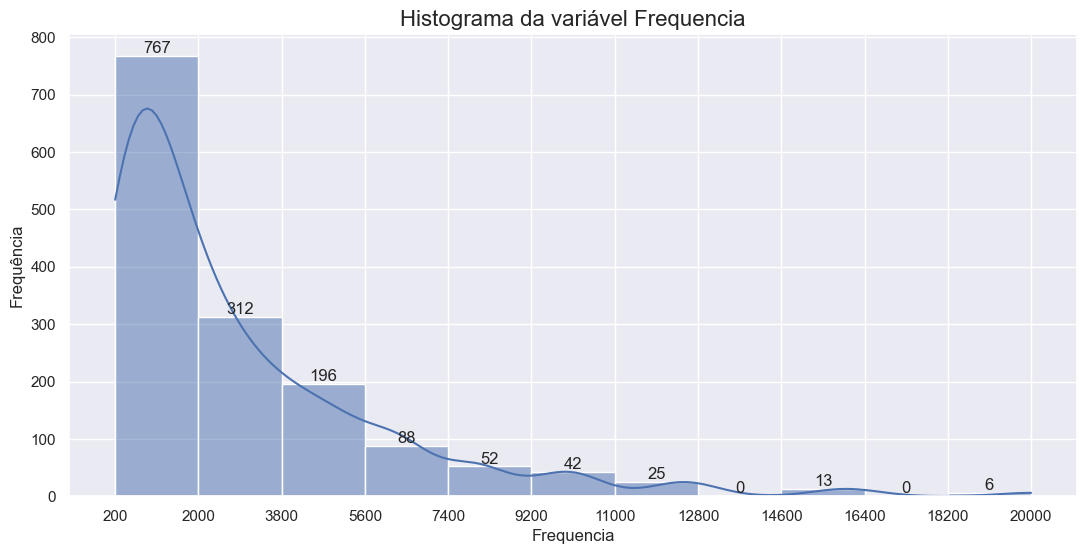

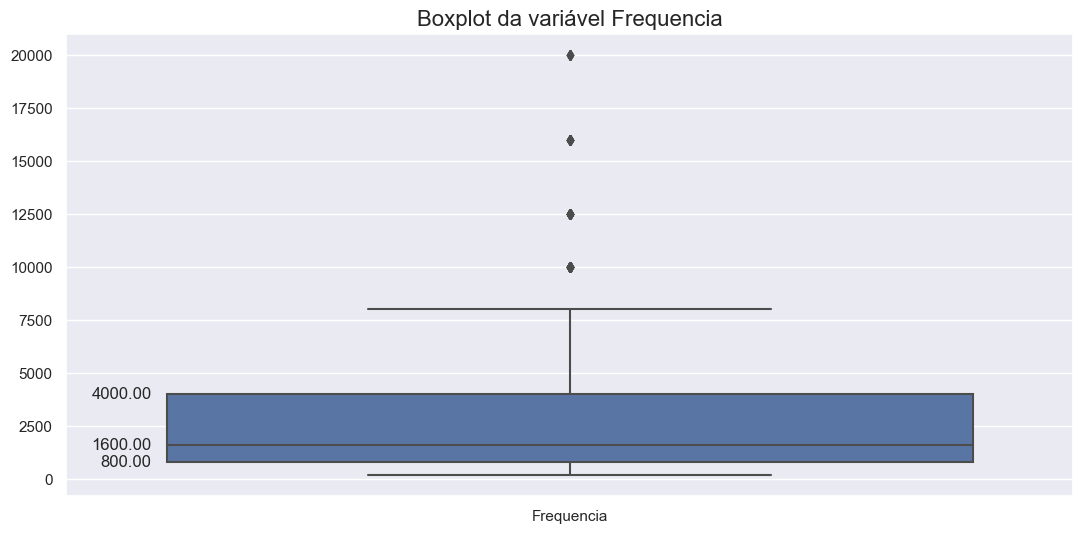

Resumo estatístico da variável AnguloDeAtaque
 count    1501.000000
mean        6.789340
std         5.918926
min         0.000000
25%         2.000000
50%         5.400000
75%         9.900000
max        22.200000
Name: AnguloDeAtaque, dtype: float64

- A distribuição dos dados é assimétrica positiva, ou seja, a cauda é maior à direita, visto que, o coeficiente de assimetria da variável AnguloDeAtaque é:
 0.6871822701009305

- A curva é muito achatada, ou seja, platicúrtica, visto que, o coeficiente de curtose da variável AnguloDeAtaque é:
 -0.4150225580915734


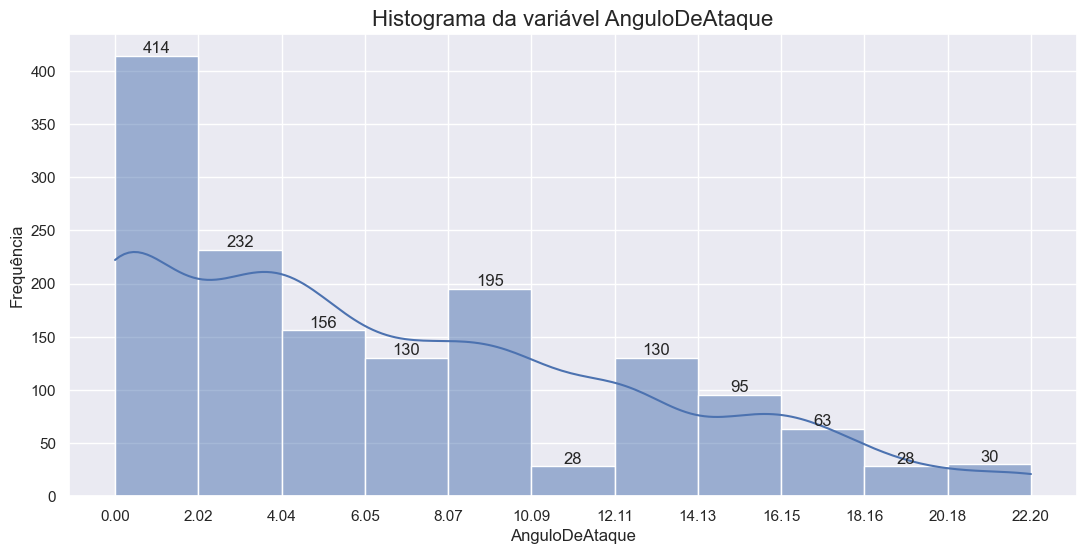

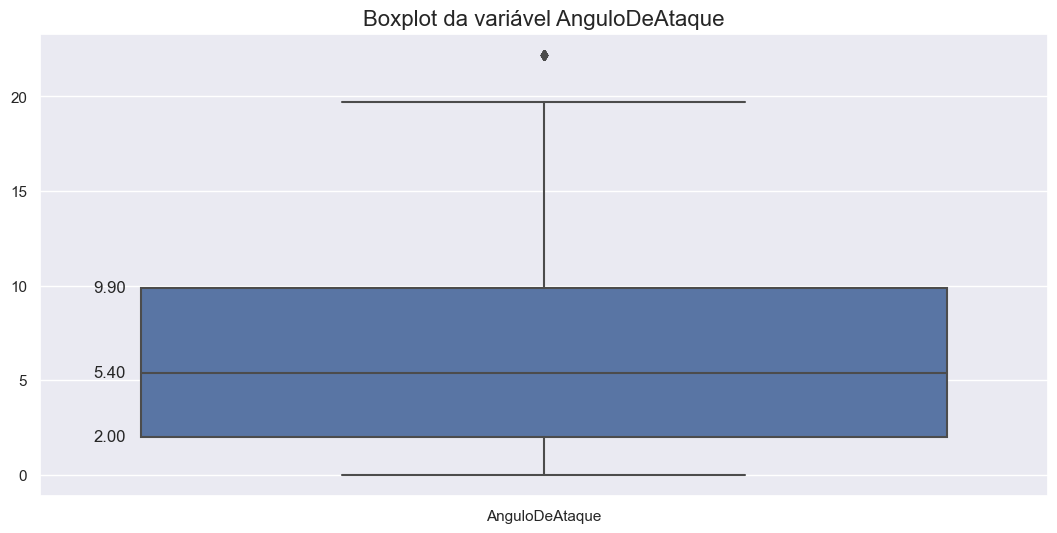

Resumo estatístico da variável ComprimentoDaCorda
 count    1501.000000
mean        0.136324
std         0.093401
min         0.025400
25%         0.050800
50%         0.101600
75%         0.228600
max         0.304800
Name: ComprimentoDaCorda, dtype: float64

- A distribuição dos dados é assimétrica positiva, ou seja, a cauda é maior à direita, visto que, o coeficiente de assimetria da variável ComprimentoDaCorda é:
 0.45953366623233377

- A curva é muito achatada, ou seja, platicúrtica, visto que, o coeficiente de curtose da variável ComprimentoDaCorda é:
 -1.0332224339391485


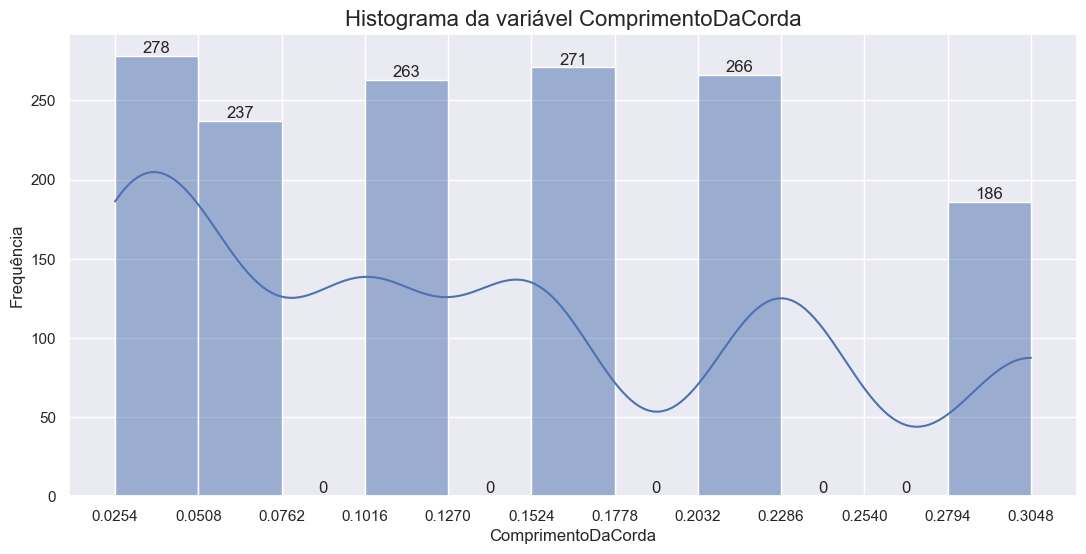

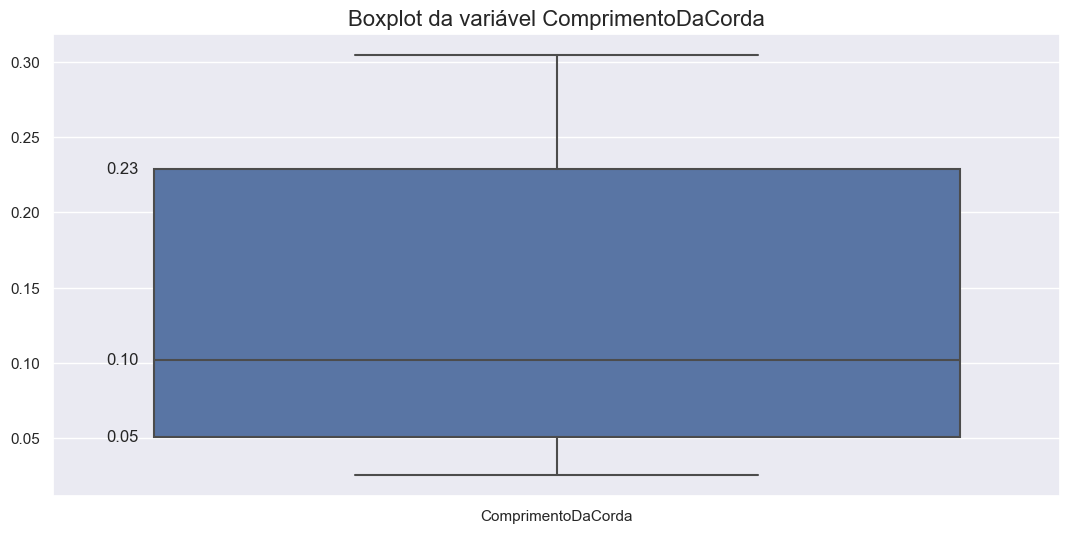

Resumo estatístico da variável VelocidadeDoFluxo
 count    1501.000000
mean       50.854630
std        15.571509
min        31.700000
25%        39.600000
50%        39.600000
75%        71.300000
max        71.300000
Name: VelocidadeDoFluxo, dtype: float64

- A distribuição dos dados é assimétrica positiva, ou seja, a cauda é maior à direita, visto que, o coeficiente de assimetria da variável VelocidadeDoFluxo é:
 0.23614778985058374

- A curva é muito achatada, ou seja, platicúrtica, visto que, o coeficiente de curtose da variável VelocidadeDoFluxo é:
 -1.5633545688905168


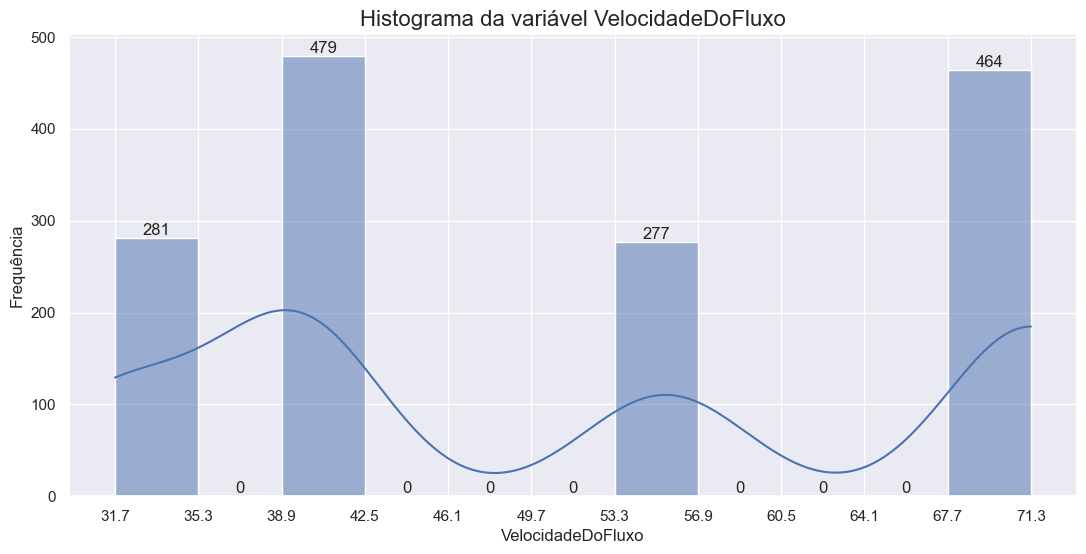

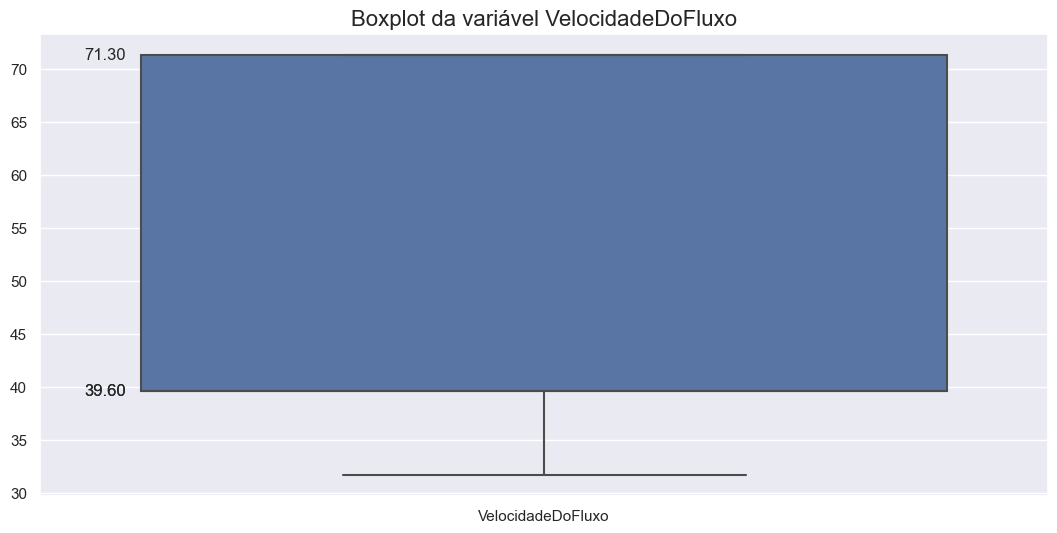

Resumo estatístico da variável EspessuraDeDeslocamento
 count    1501.000000
mean        0.011150
std         0.013156
min         0.000401
25%         0.002535
50%         0.004957
75%         0.016104
max         0.058411
Name: EspessuraDeDeslocamento, dtype: float64

- A distribuição dos dados é assimétrica positiva, ou seja, a cauda é maior à direita, visto que, o coeficiente de assimetria da variável EspessuraDeDeslocamento é:
 1.7001088115230367

- A curva é muito alongada, ou seja, leptocúrtica, visto que, o coeficiente de curtose da variável EspessuraDeDeslocamento é:
 2.2111735897793845


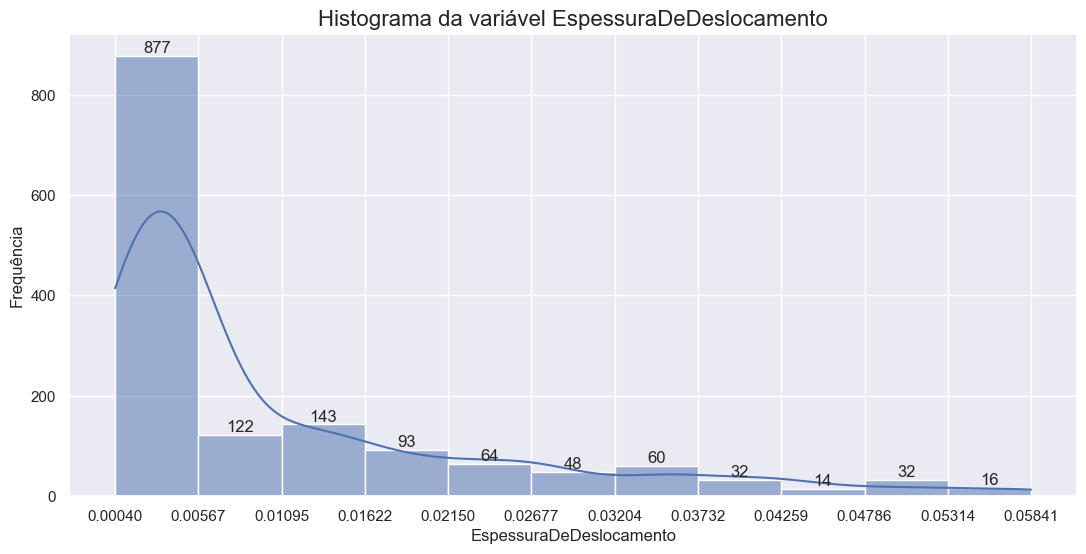

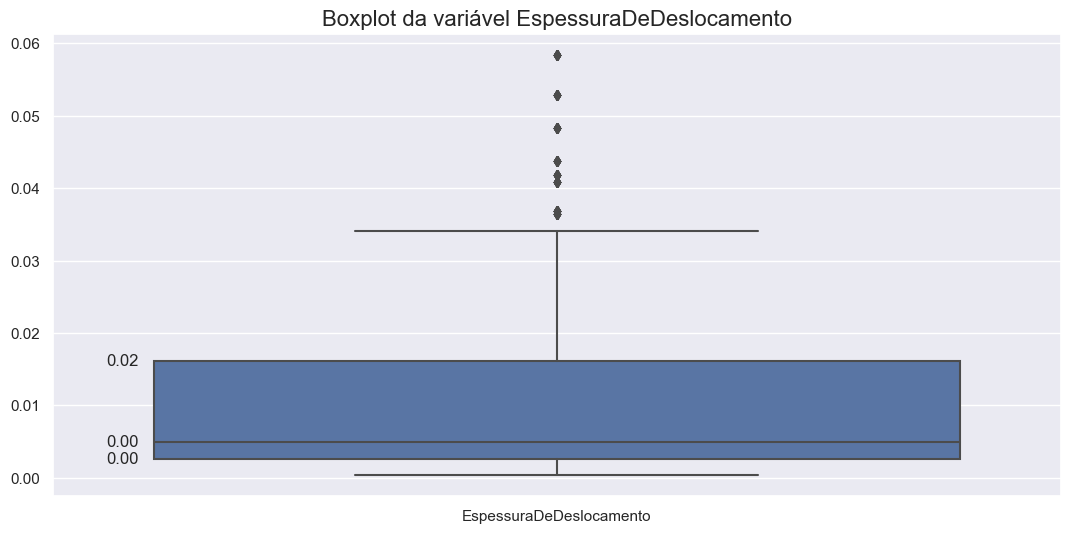

In [19]:
# Loop que percorre todas as colunas
for k in df.columns[0:len(df.columns)-1]:
    # Verifica se a coluna não possui valores do tipo texto
    if df[k].dtypes != object:
        
        # Sumário estatístico
        print("Resumo estatístico da variável " + k + "\n", df[k].describe())
        
        # Verifica a assimetria e a curtose da variável
        verificaAssimetriaCurtose(df[k], k)
        
        # Histograma
        desenhaHistograma(df[k], k)
        
        # Boxplot
        desenhaBoxplot(df[k], k)

###### 4.2.3.1 Análise descritiva da variável Comprimento da Corda

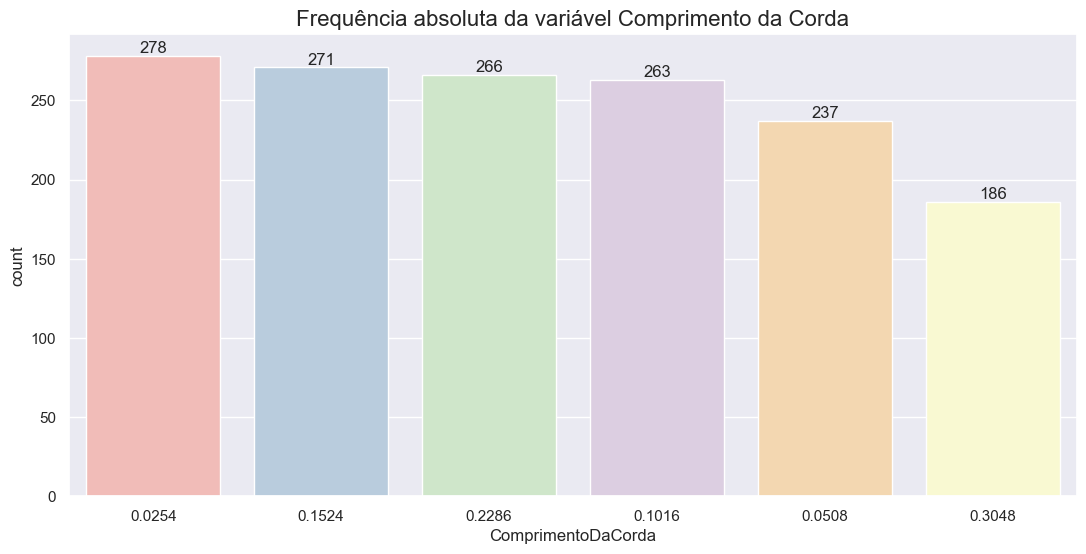

In [20]:
# Desenha um CountPlot
desenhaCountPlot(df.ComprimentoDaCorda, "Comprimento da Corda" )

###### 4.2.3.2 Análise descritiva da variável Velocidade do Fluxo

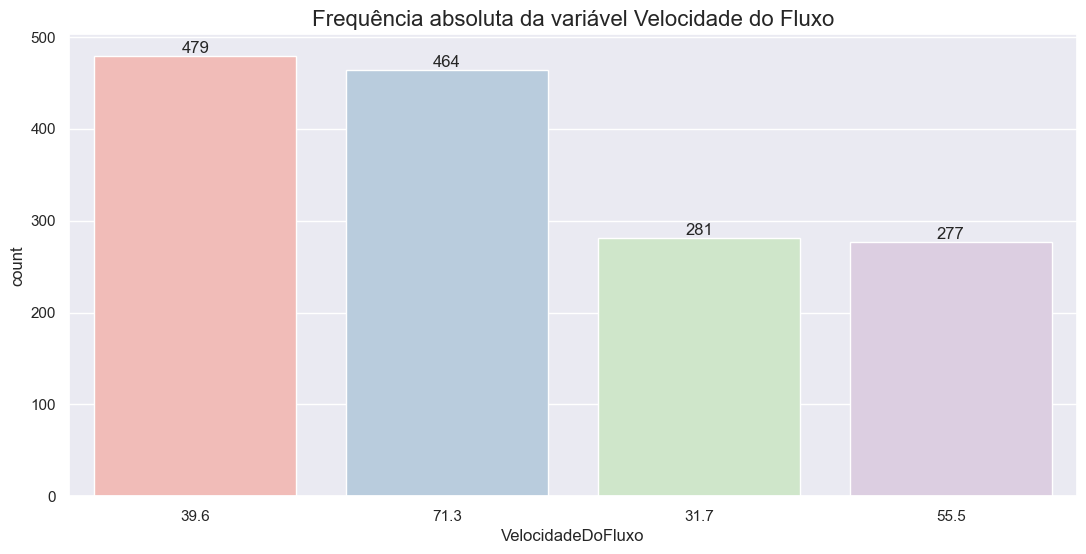

In [21]:
# Desenha um CountPlot
desenhaCountPlot(df.VelocidadeDoFluxo, "Velocidade do Fluxo")

##### 4.2.4 Análise descritiva das variáveis Categóricas

In [ ]:
# Loop que percorre todas as colunas
for k in df.columns[0:len(df.columns)-1]:
    # Verifica se a coluna possui valores do tipo texto
    if df[k].dtypes == object:
        
        # Frequência absoluta 
        desenhaCountPlot(df[k], k)
        
        # Percentuais
        desenhaPizza(df[k], k)       

##### 4.2.5 Análise descritiva da variável alvo

In [22]:
# Sumário estatístico
pd.DataFrame(df[variavelAlvo].describe())

,NivelDePressaoSonora
count,1501.000000
mean,124.845143
std,6.898639
min,103.380000
25%,120.209000
50%,125.724000
75%,130.000000
max,140.987000


In [23]:
# Assimetria e curtose da variável alvo
verificaAssimetriaCurtose(df[variavelAlvo], variavelAlvo)


- A distribuição dos dados é assimétrica negativa, ou seja, a cauda é maior à esquerda, visto que, o coeficiente de assimetria da variável NivelDePressaoSonora é:
 -0.422179199763096

- A curva é muito achatada, ou seja, platicúrtica, visto que, o coeficiente de curtose da variável NivelDePressaoSonora é:
 -0.30966674384396153


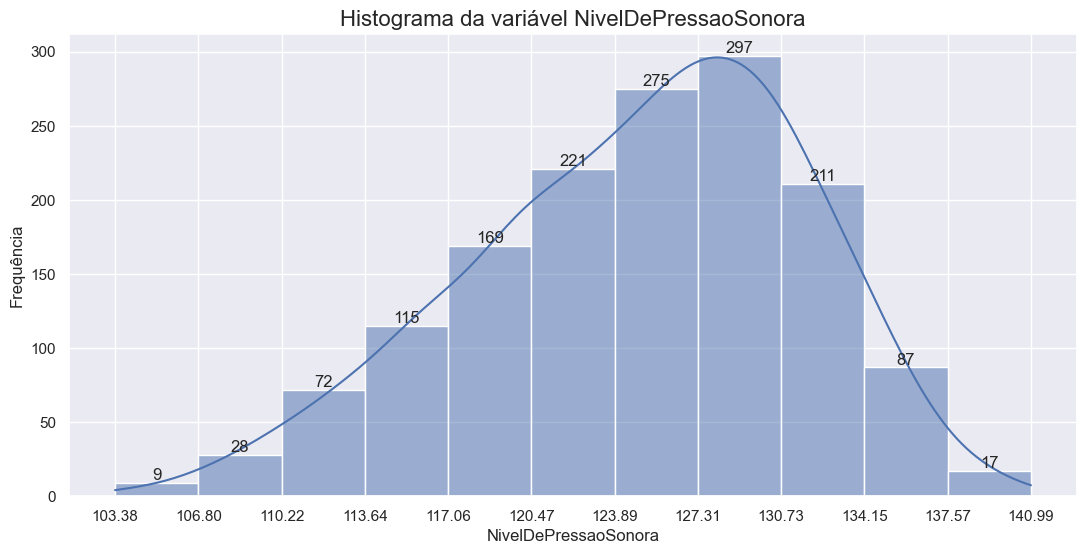

In [24]:
# Frequência absoluta 
desenhaHistograma(df[variavelAlvo], variavelAlvo)

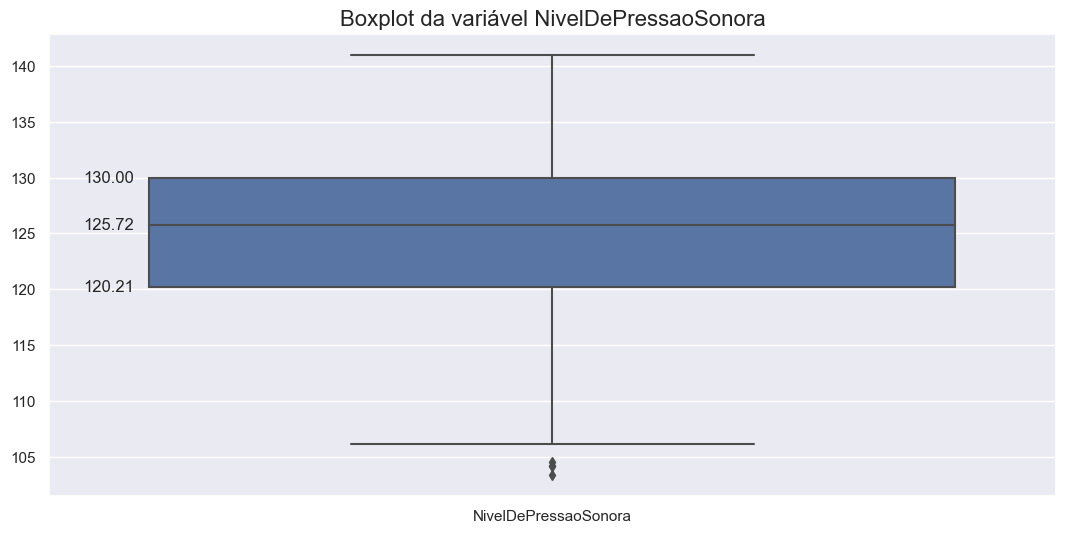

In [25]:
# Percentuais
desenhaBoxplot(df[variavelAlvo], variavelAlvo)

##### 4.2.6 - Correlação entre as variáveis

###### 4.2.6.1 - Matriz de correlação 

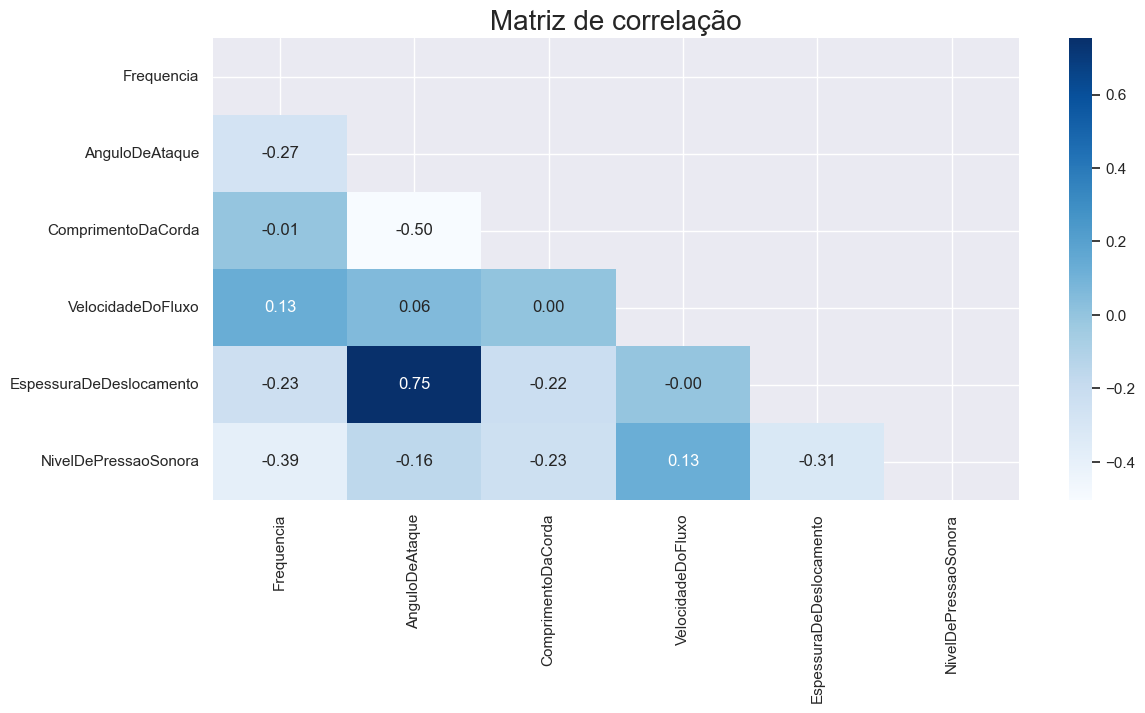

In [26]:
# Calculando a correlação 
correlacao = df.corr()

# Criando uma máscara
mascara = np.zeros_like(correlacao)

# Selecionando a matriz triangular inferior da máscara.
mascara[np.triu_indices_from(mascara)] = True

# Cria a matriz de correlação
fig = plt.subplots(figsize=(13, 6))
sns.heatmap(data = correlacao,
            mask = mascara,
            annot = True,
            fmt = '.2f',
            cmap='Blues',

            )
plt.title('Matriz de correlação', fontsize = 20)
plt.show()

## 5 - Transformando os dados

In [27]:
# Faz uma cópia do dataframe
df2 = df.copy()

### 5.1 Tratando valores iguais a zero

In [28]:
# Verificando as colunas que possuem valores iguais a zero
# Loop que percorre todas as colunas
for k in df2.columns:
    
    # Verifica se os valores não são do tipo texto
    if df2[k].dtype != object:
        
        # Imprime na tela a quantidade de valores iguais a zero existentes na coluna
        print(k + ":", len(df2[df2[k] == 0]))

Frequencia: 0
AnguloDeAtaque: 329
ComprimentoDaCorda: 0
VelocidadeDoFluxo: 0
EspessuraDeDeslocamento: 0
NivelDePressaoSonora: 0


### 5.2 - Identificando e tratando valores outliers

In [ ]:
# Loop que percorre todas as colunas
# A notação de slicing [0:13] é para não incluir a variável alvo, porque apesar de ter números, a variável alvo é categórica
for k in df.columns[0:13]:
    
    # Verifica se os valores da coluna não são do tipo texto
    if df2[k].dtype != object:
       
        # Calculando o zscore da coluna
        zscore = (df2[k] - df2[k].mean()) / df2[k].std()
        
        # Pesquisando valores menores que -3 ou maiores que 3 que são considerados outliers
        outliers = zscore[(zscore < -3) | (zscore > 3)]
        
        # Calculando o limite superior
        limiteSuperior = df2[k].mean() + 3 * df2[k].std()

        # Calculando o limite inferior
        limiteInferior = df2[k].mean() - 3 * df2[k].std()
        
        # Verifica se há outliers na coluna 
        if len(outliers) > 0:
            
            # Calcula a média da coluna, excluindo os valores outliers
            media = df2[k][(df[k] > limiteInferior) & (df2[k] <= limiteSuperior)].mean()
            
            # Cria uma lista vazia para armazenar as linhas com outliers
            linhasComOutlier = []
             
            # Loop que percorre as linhas com outliers
            for j in outliers.index:
                
                # Substitui a célula com valor outlier pela média
                df2[k] = df2[k].replace(df2.iloc[j][k], media)
                
                # Adiciona o índice da linha na lista
                linhasComOutlier.append(j)
                
            print("- Quantidade de valores outliers " + "da variável " + k + " substituídos pela média"  + ":", len(outliers))
            print("- Linha (as) da variável " + k + " que foi (foram) alterada (as):", linhasComOutlier)    

### 5.3 - Convertendo variáveis categóricas em números

In [ ]:
# Verificando o tipo de dados das colunas
df2.info()

#### 5.3.1 Convertendo as variáveis preditoras de texto para número

##### 5.3.2.1 Encoding com o Pandas

In [ ]:
df3 = pd.get_dummies(df2)
df3.head()

In [ ]:
# Visualizando o nome das colunas
df3.columns

In [ ]:
# Organizando o dataframe
valoresVariavelAlvo = df3[variavelAlvo]
df3.drop([variavelAlvo],  axis=1, inplace = True)

# Atualizando a variável alvo
df3[variavelAlvo] = valoresVariavelAlvo
df3.columns

## 6 - Dividindo os dados em treino e teste

ATENÇÃO!! Qual o dataframe será utilizado df2 ou df3 ?

In [29]:
# Fazendo uma cópia do dataframa
dfDados = df2.copy()

In [30]:
# Separando as variáveis preditoras e a variável alvo
numeroObservacoes = len(dfDados)
numeroVariaveisPreditoras = len(dfDados.columns)-1

# A notação de slicing [0:numeroVariaveisPreditoras] é para não incluir a variável alvo
X = dfDados[dfDados.columns[0:numeroVariaveisPreditoras]].values.reshape((numeroObservacoes, numeroVariaveisPreditoras)) # X deve sempre ser uma matriz e nunca um vetor
y = dfDados[variavelAlvo].values # y pode ser um vetor

In [31]:
# Pesquisa os melhores valores para o parâmetro random_state
# Array de valores para random_state de 1 até 200
arrayRandomStates = np.arange(start=1, stop=200)

# Cria uma lista vazia para armazenar os acertos
listaR2 = []

# Loop que percorre todos os valores da arrayRandomStates
for k in arrayRandomStates:
    Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=k)
    modelo = XGBRegressor()
    modelo.fit(Xtreino, Ytreino)
    previsoes = modelo.predict(Xteste)
    listaR2.append(round(r2_score(Yteste, previsoes)*100,2))
    
# Exibe os melhores valores para o random_state
resultados = pd.DataFrame({'random_state':arrayRandomStates, 
                           'R2':listaR2})
melhorRandomState = resultados[resultados['R2'] == resultados['R2'].max()]
melhorRandomState

,random_state,R2
145,146,97.22


In [32]:
# Divide os dados em treino e teste
Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=int(melhorRandomState["random_state"][0:1].values))

## 7 - Seleção de variáveis

In [33]:
# Criando um objeto da classe SFS para selecionar as melhores variáveis preditoras conforme R2, utilizando o algoritmo XGBRegressor.
sfs = SFS (
    estimator  = XGBRegressor(), 
    k_features = numeroVariaveisPreditoras,
    forward    = True, 
    floating   = False, 
    scoring    = 'r2',
    cv         = 3
)

# Convertendo os valores de X para DataFrame. Isso facilita para retornar o nome das variáveis
dfX = pd.DataFrame(X, columns=dfDados.columns[0:numeroVariaveisPreditoras])

# Convertendo os valores de y para um objeto do tipo Series do Pandas
y_series = pd.Series(y)

# Pesquisando as melhores variáveis preditoras.
sfs = sfs.fit(
    X = dfDados[dfDados.columns[0:numeroVariaveisPreditoras]], 
    y = dfDados[variavelAlvo], 
)

# Convertendo o resultado da pesquisa das melhores variáveis para um dataframe.
# O método "T" transforma linhas em colunas e colunas em linhas
dfSelecaoVariaveis = pd.DataFrame(sfs.subsets_).T

# Converte a coluna "avg_score" para o tipo float
dfSelecaoVariaveis.avg_score = dfSelecaoVariaveis.avg_score.astype(float)

# Ordena o dataframe de acordo a variável "avg_score" do maior para o menor
dfSelecaoVariaveis.sort_values(by=["avg_score"], ascending=False, inplace=True)
dfSelecaoVariaveis

,feature_idx,cv_scores,avg_score,feature_names
5,"(0, 1, 2, 3, 4)","[0.7469794174806161, 0.7242389032942183, 0.626...",0.699387,"(Frequencia, AnguloDeAtaque, ComprimentoDaCord..."
4,"(0, 1, 2, 4)","[0.7865449310771315, 0.6769455220604073, 0.556...",0.673358,"(Frequencia, AnguloDeAtaque, ComprimentoDaCord..."
3,"(0, 1, 4)","[0.7679606698542928, 0.5950562845468244, 0.485...",0.616322,"(Frequencia, AnguloDeAtaque, EspessuraDeDesloc..."
2,"(0, 4)","[0.40748649091310074, 0.2312548173036476, 0.06...",0.235130,"(Frequencia, EspessuraDeDeslocamento)"
1,"(0,)","[0.2717313918828673, 0.0417613580818893, -0.02...",0.096898,"(Frequencia,)"


In [ ]:
# Escolhendo as melhores variáveis
melhoresVariaveis = dfSelecaoVariaveis.iloc[0,3]

# Convertendo a Tupla para uma lista
variaveisSelecionadas = list(melhoresVariaveis)
variaveisSelecionadas

## 8 - Dividindo os dados de treino e teste com as variáveis selecionadas

In [ ]:
# Separando as variáveis preditoras e a variável alvo
numeroObservacoes = len(dfDados)
numeroVariaveisPreditoras = len(variaveisSelecionadas)
X = dfDados[variaveisSelecionadas].values.reshape((numeroObservacoes, numeroVariaveisPreditoras)) # X deve sempre ser uma matriz e nunca um vetor
y = dfDados[variavelAlvo].values # y pode ser um vetor

In [ ]:
# Pesquisa os melhores valores para o parâmetro random_state
# Array de valores para random_state de 1 até 100
arrayRandomStates = np.arange(start=1, stop=200)

# Cria uma lista vazia para armazenar os acertos
listaR2 = []

# Loop que percorre todos os valores da arrayRandomStates
for k in arrayRandomStates:
    Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=k)
    modelo = XGBRegressor()
    modelo.fit(Xtreino, Ytreino)
    previsoes = modelo.predict(Xteste)
    listaR2.append(round(r2_score(Yteste, previsoes)*100,2))
    
# Exibe os melhores valores para o random_state
resultados = pd.DataFrame({'random_state':arrayRandomStates, 
                           'R2':listaR2})
melhorRandomState = resultados[resultados['R2'] == resultados['R2'].max()]
melhorRandomState

In [ ]:
# Divide os dados em treino e teste
Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=int(melhorRandomState["random_state"][0:1].values))

## 9 - Cross Validation

In [34]:
def calculaCrossValidation(dadosEntrada, dadosSaida):
    # Criando uma lista vazia para armazenar os modelos de Machine Learning
    modelos = []
    
    # Adicionando os modelos a lista
    modelos.append(("Regressão Linear", LinearRegression()))
    modelos.append(("Ridge", Ridge()))
    modelos.append(("KNN", KNeighborsRegressor()))
    modelos.append(("SVM", LinearSVR()))
    modelos.append(("Árvore de Decisão", DecisionTreeRegressor()))
    modelos.append(("Random Forest", RandomForestRegressor()))
    modelos.append(("Extra Tree", ExtraTreesRegressor()))
    modelos.append(("Bagging", BaggingRegressor()))
    modelos.append(("AdaBoost", AdaBoostRegressor()))
    modelos.append(("Voting", VotingRegressor(estimators=[("AD",DecisionTreeRegressor()),("GB", GradientBoostingRegressor()),("RL", LinearRegression())])))
    modelos.append(("Gradient Tree Boosting", GradientBoostingRegressor()))
    modelos.append(("XGBoost", XGBRegressor()))    

    # Criando um Dataframe para armazenar a média de cada um dos algoritmos testados.
    dfMedias   = pd.DataFrame(columns = ['Algoritmo', 'Media'])

    # Define a quantidade de folds
    numeroFolds = 5

    # Define a semente para criar os folds
    seed = 28

    # KFold divide o conjunto de dados em grupos de amostras, chamados folds
    kfold = KFold(n_splits = numeroFolds, shuffle=True, random_state = seed)

    for nome, construtor in modelos:
        # Cross Validation
        resultados = cross_val_score(construtor, dadosEntrada, dadosSaida, cv=kfold, scoring="r2")

        # Calcula a média dos resultados
        media = resultados.mean()*100

        # Define os parâmetros para adicionar a linha no dataframe
        novaLinha = {"Algoritmo": nome,
                     "Media": media}

        # Adicionando uma linha no final do DataFrame
        dfMedias.loc[len(dfMedias.index)] = novaLinha

    # Ordena o dataframe da maior média para a menor    
    dfMedias.sort_values(by=["Media"], ascending=False, inplace=True)
    
    return dfMedias

### 9.1 - Cross Validation com dados originais

In [35]:
# Calcula cross validation
calculaCrossValidation(X, y)

,Algoritmo,Media
6,Extra Tree,95.693964
11,XGBoost,95.537413
5,Random Forest,93.844112
7,Bagging,92.898777
4,Árvore de Decisão,86.017281
10,Gradient Tree Boosting,85.690308
9,Voting,84.470585
8,AdaBoost,68.748908
0,Regressão Linear,51.079470
1,Ridge,48.123848


### 9.2 - Cross Validation com dados normalizados

In [ ]:
# Cria o objeto da classe MinMaxScaler 
min_max_scaler = MinMaxScaler()

# Realiza a normalização dimensionando as variáveis em uma escala entre 0 e 1 nos dados de entrada
xNormalizado = min_max_scaler.fit_transform(X)

In [ ]:
# Calcula cross validation
calculaCrossValidation(xNormalizado, y)

### 9.3 - Cross Validation com dados padronizados

In [ ]:
# Cria o objeto StandardScaler, calcula a média e o desvio-padrão que serão usados para padronizar os dados
scaler = StandardScaler()

# Realiza a padronização centralizando e dimensionando dados nos dados de entrada
xPadronizado = scaler.fit_transform(X)

In [ ]:
# Calcula cross validation
calculaCrossValidation(xPadronizado, y)

## 10 - Preparando os dados

### 10.1 - Normalizando os dados

In [ ]:
# Cria o objeto da classe MinMaxScaler 
min_max_scaler = MinMaxScaler()

# Realiza a normalização dimensionando as variáveis em uma escala entre 0 e 1 nos dados de  Xtreino
XtreinoNormalizados = min_max_scaler.fit_transform(Xtreino)

# Realiza a normalização dimensionando as variáveis em uma escala entre 0 e 1 nos dados de Xteste
XtesteNormalizados = min_max_scaler.fit_transform(Xteste)

### 10.2 - Padronizando os dados

In [ ]:
# Cria o objeto StandardScaler, calcula a média e o desvio-padrão que serão usados para padronizar os dados
scaler = StandardScaler()

# Realiza a padronização centralizando e dimensionando dados nos dados de Xtreino
XtreinoPadronizados = scaler.fit_transform(Xtreino)

# Realiza a padronização centralizando e dimensionando dados nos dados de Xteste
XtestePadronizados = scaler.fit_transform(Xteste)

### 10.3 - Selecionando a apresentação dos dados

In [36]:
# Os dados podem estar com apresentação "Originais", "Normalizados" ou "Padronizados"
apresentacaoDosDados = "Originais"

if apresentacaoDosDados == "Originais":
    dadosXtreino = Xtreino
    dadosXteste = Xteste
elif apresentacaoDosDados == "Normalizados":
    dadosXtreino = XtreinoNormalizados
    dadosXteste = XtesteNormalizados
else:
    dadosXtreino = XtreinoPadronizados
    dadosXteste = XtestePadronizados

print("Os dados estão com a seguinte apresentação:", apresentacaoDosDados)

Os dados estão com a seguinte apresentação: Originais


## 11 - Criando os modelos de regressão

In [37]:
# DataFrame para comparar a acurácia de cada algoritmo
# DataFrame para comparar a R2 de cada algoritmo
comparaAlgoritmo = {"Algoritmo": ["Extra Tree", "XGBRegressor", "Random Forest"],
                   "R2": ["-", "-", "-"],
                   "Erro Absoluto Medio": ["-", "-", "-"],
                   "Erro Quadratico Medio": ["-", "-", "-"],
                   "Raiz quadrada do Erro Quadratico Medio": ["-", "-", "-"] 
                   }
dfComparaAlgoritmo = pd.DataFrame(comparaAlgoritmo)
dfComparaAlgoritmo

,Algoritmo,R2,Erro Absoluto Medio,Erro Quadratico Medio,Raiz quadrada do Erro Quadratico Medio
0,Extra Tree,-,-,-,-
1,XGBRegressor,-,-,-,-
2,Random Forest,-,-,-,-


### 11.11 - Extra Tree

In [38]:
# Criando o modelo
extraTreesRegressor = ExtraTreesRegressor()

# Treinamento do modelo
extraTreesRegressor.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = extraTreesRegressor.predict(dadosXteste)

# Calculando o R2 do modelo
r2 = r2_score(Yteste, previsoes)
print("R2 do modelo: %.2f" % (r2*100) + "%")

# Calcula o Erro Absoluto Médio
mae = mean_absolute_error(Yteste, previsoes)
print("Erro absoluto médio: %.2f" % mae)

# Calcula o Erro Quadrático Médio
mse = mean_squared_error(Yteste, previsoes)
print("Erro Quadrático Médio: %.2f" % mse)

# Calcula a Raiz quadrada do Erro Quadrático Médio
rmse = np.sqrt(mse)
print("Raiz quadrada do Erro Quadrático Médio: %.2f" % rmse)

R2 do modelo: 96.96%
Erro absoluto médio: 0.91
Erro Quadrático Médio: 1.59
Raiz quadrada do Erro Quadrático Médio: 1.26


In [39]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[0,1] =  round((r2 * 100), 2)
dfComparaAlgoritmo.iloc[0,2] =  round(mae,2)
dfComparaAlgoritmo.iloc[0,3] =  round(mse,2)
dfComparaAlgoritmo.iloc[0,4] =  round(rmse,2)
dfComparaAlgoritmo

,Algoritmo,R2,Erro Absoluto Medio,Erro Quadratico Medio,Raiz quadrada do Erro Quadratico Medio
0,Extra Tree,96.96,0.91,1.59,1.26
1,XGBRegressor,-,-,-,-
2,Random Forest,-,-,-,-


#### Avaliando os resíduos
Uma importante premissa em problemas de regressão é que os resíduos, ou seja, as diferenças entre o valores reais e o valores previstos, devem seguir uma distribuição normal, ou pelo menos, de forma aproximada. <br> 
Em uma distribuição normal, a curva do gráfico de densidade possui um formato de sino e é simétrica em torno da média, e quanto menor o desvio-padrão, mais concentrada é a curva em torno da média. Em uma distribuição normal a média é igual a 0 e o desvio-padrão é igual a 1.<br>
Quando os resíduos do modelo apresentam uma distribuição normal significa que o modelo apresentou um bom desempenho.

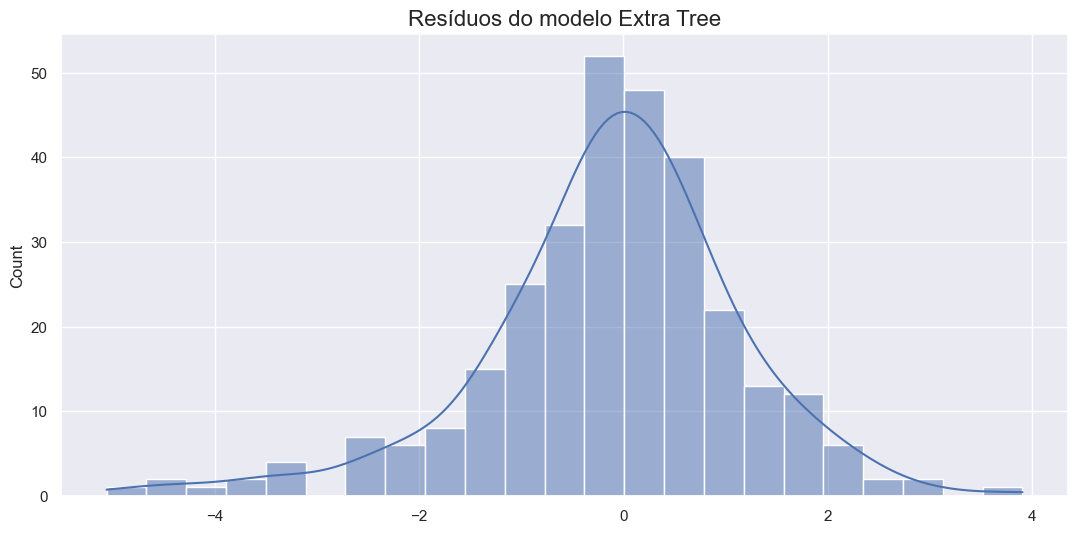

Média dos resíduos: -0.11711671096345919
Desvio padrão dos resíduos: 1.2573884050204325


In [40]:
# Calculando os residuos
residuos = Yteste - previsoes

# Criando um histograma
fig = plt.subplots(figsize=(13, 6))
ax = sns.histplot(residuos, kde=True)
ax.set_title("Resíduos do modelo Extra Tree", fontsize = 16)
plt.show()

# Visualizando a média e o desvio padrão dos resíduos
print("Média dos resíduos:", residuos.mean())
print("Desvio padrão dos resíduos:", residuos.std())

### 11.12 - XGBoost

In [41]:
# Criando o modelo
xgb = XGBRegressor()

# Treinamento do modelo
xgb.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = xgb.predict(dadosXteste)

# Calculando o R2 do modelo
r2 = r2_score(Yteste, previsoes)
print("R2 do modelo: %.2f" % (r2*100) + "%")

# Calcula o Erro Absoluto Médio
mae = mean_absolute_error(Yteste, previsoes)
print("Erro absoluto médio: %.2f" % mae)

# Calcula o Erro Quadrático Médio
mse = mean_squared_error(Yteste, previsoes)
print("Erro Quadrático Médio: %.2f" % mse)

# Calcula a Raiz quadrada do Erro Quadrático Médio
rmse = np.sqrt(mse)
print("Raiz quadrada do Erro Quadrático Médio: %.2f" % rmse)

R2 do modelo: 97.22%
Erro absoluto médio: 0.87
Erro Quadrático Médio: 1.46
Raiz quadrada do Erro Quadrático Médio: 1.21


In [42]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[1,1] =  round((r2 * 100), 2)
dfComparaAlgoritmo.iloc[1,2] =  round(mae, 2)
dfComparaAlgoritmo.iloc[1,3] =  round(mse,2)
dfComparaAlgoritmo.iloc[1,4] =  round(rmse,2)
dfComparaAlgoritmo

,Algoritmo,R2,Erro Absoluto Medio,Erro Quadratico Medio,Raiz quadrada do Erro Quadratico Medio
0,Extra Tree,96.96,0.91,1.59,1.26
1,XGBRegressor,97.22,0.87,1.46,1.21
2,Random Forest,-,-,-,-


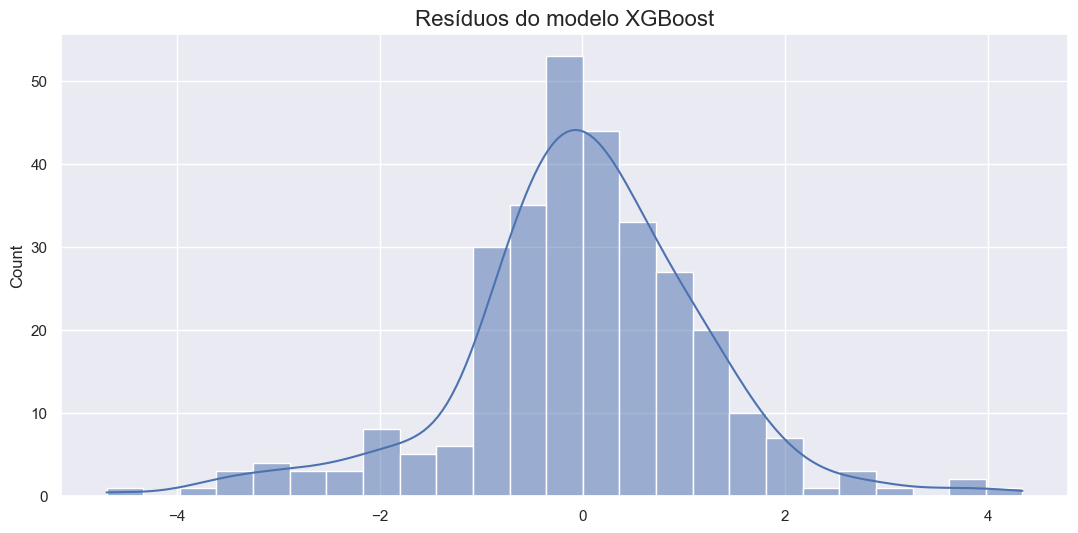

Média dos resíduos: 0.007493349601264273
Desvio padrão dos resíduos: 1.207080126644716


In [43]:
# Calculando os residuos
residuos = Yteste - previsoes

# Criando um histograma
fig = plt.subplots(figsize=(13, 6))
ax = sns.histplot(residuos, kde=True)
ax.set_title("Resíduos do modelo XGBoost", fontsize = 16)
plt.show()

# Visualizando a média e o desvio padrão dos resíduos
print("Média dos resíduos:", residuos.mean())
print("Desvio padrão dos resíduos:", residuos.std())

### 11.3 - Random Forest

In [44]:
# Utilizando os melhores parâmetros segundo o RandomizedSearchCV
# Criando o modelo
randomForestRegressor = RandomForestRegressor(random_state=6)

# Treinamento do modelo
randomForestRegressor.fit(Xtreino, Ytreino)

# Previsões com os dados de teste
previsoes = randomForestRegressor.predict(Xteste)

# Calculando o R2 do modelo
r2 = r2_score(Yteste, previsoes)
print("R2 do modelo: %.2f" % (r2*100) + "%")

# Calcula o Erro Absoluto Médio
mae = mean_absolute_error(Yteste, previsoes)
print("Erro absoluto médio: %.2f" % mae)

# Calcula o Erro Quadrático Médio
mse = mean_squared_error(Yteste, previsoes)
print("Erro Quadrático Médio: %.2f" % mse)

# Calcula a Raiz quadrada do Erro Quadrático Médio
rmse = np.sqrt(mse)
print("Raiz quadrada do Erro Quadrático Médio: %.2f" % rmse)

R2 do modelo: 95.21%
Erro absoluto médio: 1.18
Erro Quadrático Médio: 2.51
Raiz quadrada do Erro Quadrático Médio: 1.59


In [45]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[2,1] =  round((r2 * 100), 2)
dfComparaAlgoritmo.iloc[2,2] =  round(mae, 2)
dfComparaAlgoritmo.iloc[2,3] =  round(mse,2)
dfComparaAlgoritmo.iloc[2,4] =  round(rmse,2)
dfComparaAlgoritmo

,Algoritmo,R2,Erro Absoluto Medio,Erro Quadratico Medio,Raiz quadrada do Erro Quadratico Medio
0,Extra Tree,96.96,0.91,1.59,1.26
1,XGBRegressor,97.22,0.87,1.46,1.21
2,Random Forest,95.21,1.18,2.51,1.59


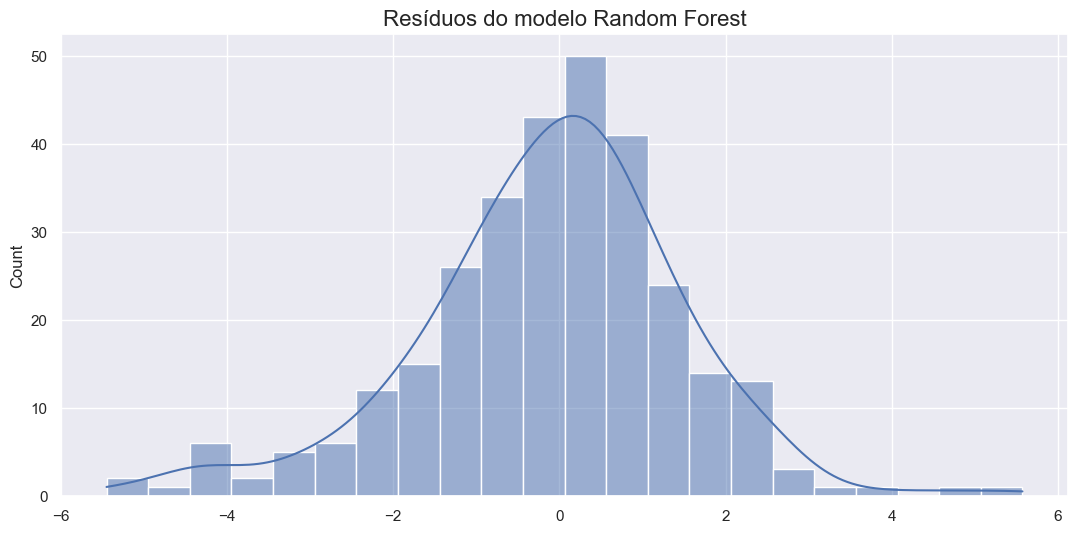

Média dos resíduos: -0.1152201661129586
Desvio padrão dos resíduos: 1.5810132443443683


In [46]:
# Calculando os residuos
residuos = Yteste - previsoes

# Criando um histograma
fig = plt.subplots(figsize=(13, 6))
ax = sns.histplot(residuos, kde=True)
ax.set_title("Resíduos do modelo Random Forest", fontsize = 16)
plt.show()

# Visualizando a média e o desvio padrão dos resíduos
print("Média dos resíduos:", residuos.mean())
print("Desvio padrão dos resíduos:", residuos.std())

## 12 - Selecionando o modelo

In [47]:
# Ordena o DataFrame de acordo o valor do Erro Absoluto Medio, em ordem crecente
dfComparaAlgoritmo.sort_values(by=["Erro Absoluto Medio"], inplace=True)
dfComparaAlgoritmo

,Algoritmo,R2,Erro Absoluto Medio,Erro Quadratico Medio,Raiz quadrada do Erro Quadratico Medio
1,XGBRegressor,97.22,0.87,1.46,1.21
0,Extra Tree,96.96,0.91,1.59,1.26
2,Random Forest,95.21,1.18,2.51,1.59


In [48]:
# Selecionando o modelo final
modeloFinal = xgb
modeloFinal

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## 13 - Salvando e carregando o modelo

### 13.1 - Salvando o modelo

In [49]:
# Salvando o modelo
arquivo = 'Dados/Airfoil-Self-Noise-Dataset/modeloRegressorFinal.sav'
pickle.dump(modeloFinal, open(arquivo, 'wb'))
print("Modelo salvo!")

Modelo salvo!


### 13.2 - Carregando o modelo

In [50]:
# Carregando o modelo
modeloRegressor = pickle.load(open(arquivo, 'rb'))
print("Modelo carregado!")
modeloRegressor

Modelo carregado!


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### 13.3 - Salvando o objeto de normalização/padronização dos dados

In [51]:
# Os dados podem estar com apresentação "Originais", "Normalizados" ou "Padronizados"
if apresentacaoDosDados == "Normalizados":
    arquivoNormalizador = 'Dados/Airfoil-Self-Noise-Dataset/normalizador.sav'
    pickle.dump(min_max_scaler, open(arquivoNormalizador, 'wb'))
    print("Normalizador salvo!")
elif apresentacaoDosDados == "Padronizados":
    arquivoPadronizador = 'Dados/Airfoil-Self-Noise-Dataset/padronizador.sav'
    pickle.dump(scaler, open(arquivoPadronizador, 'wb'))
    print("Padronizador salvo!")

## 14 - Validando o modelo

In [52]:
# Visualizando o dataframe
dfValidacao

,Frequencia,AnguloDeAtaque,ComprimentoDaCorda,VelocidadeDoFluxo,EspessuraDeDeslocamento,NivelDePressaoSonora
91,4000,1.5,0.3048,39.6,0.003921,117.741
75,6300,1.5,0.3048,71.3,0.003367,118.122


In [53]:
# Faz as previsões dos novos dados

if apresentacaoDosDados == "Originais":
    novosDados = dfValidacao[["Frequencia", "AnguloDeAtaque", "ComprimentoDaCorda", "VelocidadeDoFluxo", "EspessuraDeDeslocamento"]].values
    # Fazendo previsões
    previsoes = modeloRegressor.predict(novosDados)

elif apresentacaoDosDados == "Normalizados":
    # Carregando o objeto de normalização dos dados
    normalizador = pickle.load(open(arquivoNormalizador, 'rb'))
    # Normalizando os novos dados
    novosDados = dfValidacao[variaveisSelecionadas].values
    novosDadosNormalizados = normalizador.transform(novosDados)
    previsoes = modeloRegressor.predict(novosDadosNormalizados)

else:
    # Carregando o objeto de padronização dos dados
    padronizador = pickle.load(open(arquivoPadronizador, 'rb'))
    # Padronizando os novos dados
    novosDados = dfValidacao[variaveisSelecionadas].values
    novosDadosPadronizados = padronizador.transform(novosDados)
    # Fazendo previsões
    previsoes = modeloRegressor.predict(novosDadosPadronizados)

previsoes

array([117.62812, 117.43936], dtype=float32)